Q2. Perform the following preprocessing tasks on the dirty_iris dataset.

i)	Calculate the number and percentage of observations that are complete.

ii)	Replace all the special values in data with NA.

iii)	Define these rules in a separate text file and read them.

Print the resulting constraint object.

    – Species should be one of the following values: setosa, versicolor or virginica.

    – All measured numerical properties of an iris should be positive.

    – The petal length of an iris is at least 2 times its petal width.

    – The sepal length of an iris cannot exceed 30 cm.

    – The sepals of an iris are longer than its petals.

iv)	Determine how often each rule is broken (violatedEdits). Also summarize and plot the
result.

v)	Find outliers in sepal length using boxplot and boxplot.stats

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
DFrame = pd.DataFrame(pd.read_csv("/home/xtechilad/Documents/DDU/iris_dirty.csv"))
DFrame

,Unnamed: 0,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,@,3,1.4,0.2,Setosa
2,3,4.7,3.2,1.3,0.2,Setosa
3,4,4.6,3.1,1.5,0.2,Setosa
4,5,NaN,3.6,1.4,0.2,Setosa
...,...,...,...,...,...,...
145,146,6.7,3,5.2,2.3,Virginica
146,147,6.3,2.5,5,1.9,Virginica
147,148,6.5,3,5.2,2,Virginica
148,149,6.2,3.4,5.4,2.3,Virginica


In [17]:
DFrame.drop(['Unnamed: 0'], inplace = True, axis = 1)
DFrame

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,@,3,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,NaN,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3,5.2,2.3,Virginica
146,6.3,2.5,5,1.9,Virginica
147,6.5,3,5.2,2,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [18]:
nanList = [DFrame.loc[i].isnull().sum() for i in range(0, DFrame.shape[0])]
Complete = nanList.count(0)
print("Total complete observations: ", Complete)
print("Percentage of complete observations: {percent: .2f}%".format(percent = ((Complete/len(nanList))*100)))

Total complete observations:  131
Percentage of complete observations:  87.33%


In [19]:
DFrame.replace(["@", "_"], np.nan, inplace = True)
DFrame

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,NaN,3,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,NaN,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3,5.2,2.3,Virginica
146,6.3,2.5,5,1.9,Virginica
147,6.5,3,5.2,2,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [20]:
def rules(DFrame):
    DFrame_new = DFrame.copy(deep = True)
    DFrame_new['Rule1'] = DFrame['Species'].apply(lambda x:True if (x == 'Setosa') or (x == 'Virginica') or (x == 'Versicolor') else False)
    DFrame_new['Rule2'] = DFrame.apply(lambda x: True if (float(x.Sepal_Length) > 0.0) or (float(x.Sepal_Width) > 0.0) or (float(x.Petal_Length) > 0.0) or (float(x.Petal_Width) > 0.0) else False, axis = 1)
    DFrame_new['Rule3'] = DFrame.apply(lambda x: True if float(x.Petal_Length) >= float(x.Petal_Width)*2 else False, axis = 1)
    DFrame_new['Rule4'] = DFrame['Sepal_Length'].apply(lambda x: True if float(x) <= 30 else False)
    DFrame_new['Rule5'] = DFrame.apply(lambda x: True if float(x.Sepal_Length) > float(x.Petal_Length) else False, axis = 1)
    return DFrame_new

In [21]:
DFrame_with_rules = rules(DFrame)
DFrame_with_rules

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,Rule1,Rule2,Rule3,Rule4,Rule5
0,5.1,3.5,1.4,0.2,Setosa,True,True,True,True,True
1,NaN,3,1.4,0.2,Setosa,True,True,True,False,False
2,4.7,3.2,1.3,0.2,Setosa,True,True,True,True,True
3,4.6,3.1,1.5,0.2,Setosa,True,True,True,True,True
4,NaN,3.6,1.4,0.2,Setosa,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3,5.2,2.3,Virginica,True,True,True,True,True
146,6.3,2.5,5,1.9,Virginica,True,True,True,True,True
147,6.5,3,5.2,2,Virginica,True,True,True,True,True
148,6.2,3.4,5.4,2.3,Virginica,True,True,True,True,True


In [22]:
DFrame_with_rules[['Rule1', 'Rule2', 'Rule3', 'Rule4', 'Rule5']] = DFrame_with_rules[['Rule1', 'Rule2', 'Rule3', 'Rule4', 'Rule5']].astype(int)

In [23]:
DFrame_with_rules[['Rule1', 'Rule2', 'Rule3', 'Rule4', 'Rule5']].describe()

,Rule1,Rule2,Rule3,Rule4,Rule5
count,150.0,150.0,150.000000,150.000000,150.000000
mean,1.0,1.0,0.973333,0.940000,0.920000
std,0.0,0.0,0.161647,0.238282,0.272202
min,1.0,1.0,0.000000,0.000000,0.000000
25%,1.0,1.0,1.000000,1.000000,1.000000
50%,1.0,1.0,1.000000,1.000000,1.000000
75%,1.0,1.0,1.000000,1.000000,1.000000
max,1.0,1.0,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Ruleset Plot')

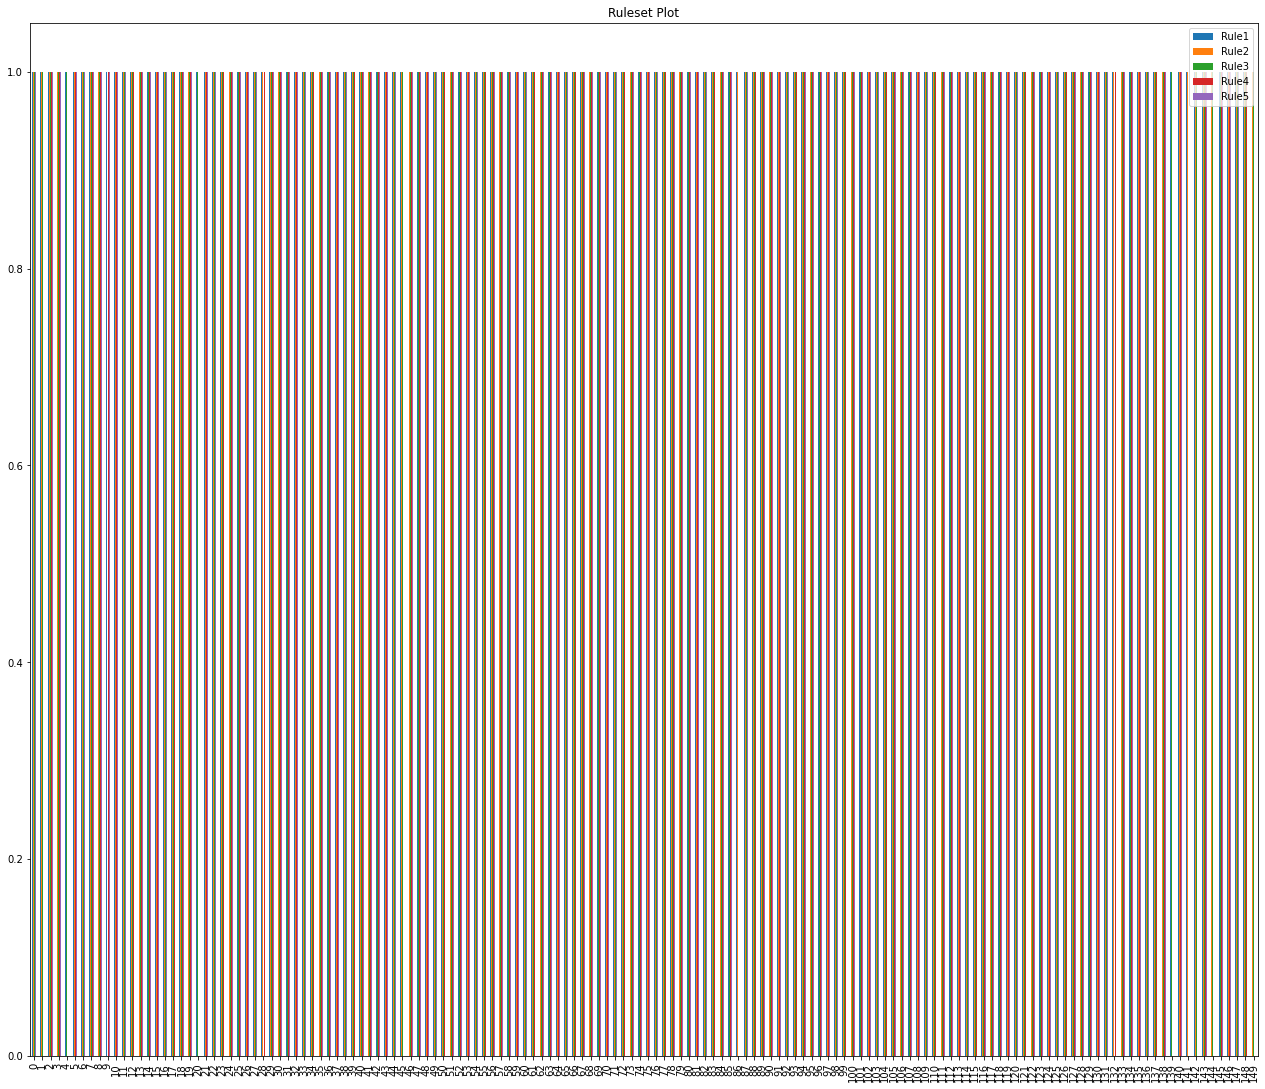

In [24]:
DFrame_with_rules.plot(y = ['Rule1', 'Rule2', 'Rule3', 'Rule4', 'Rule5'], kind = 'bar', figsize = (22, 19))
plt.title('Ruleset Plot')

<AxesSubplot:xlabel='Species', ylabel='Sepal_Length'>

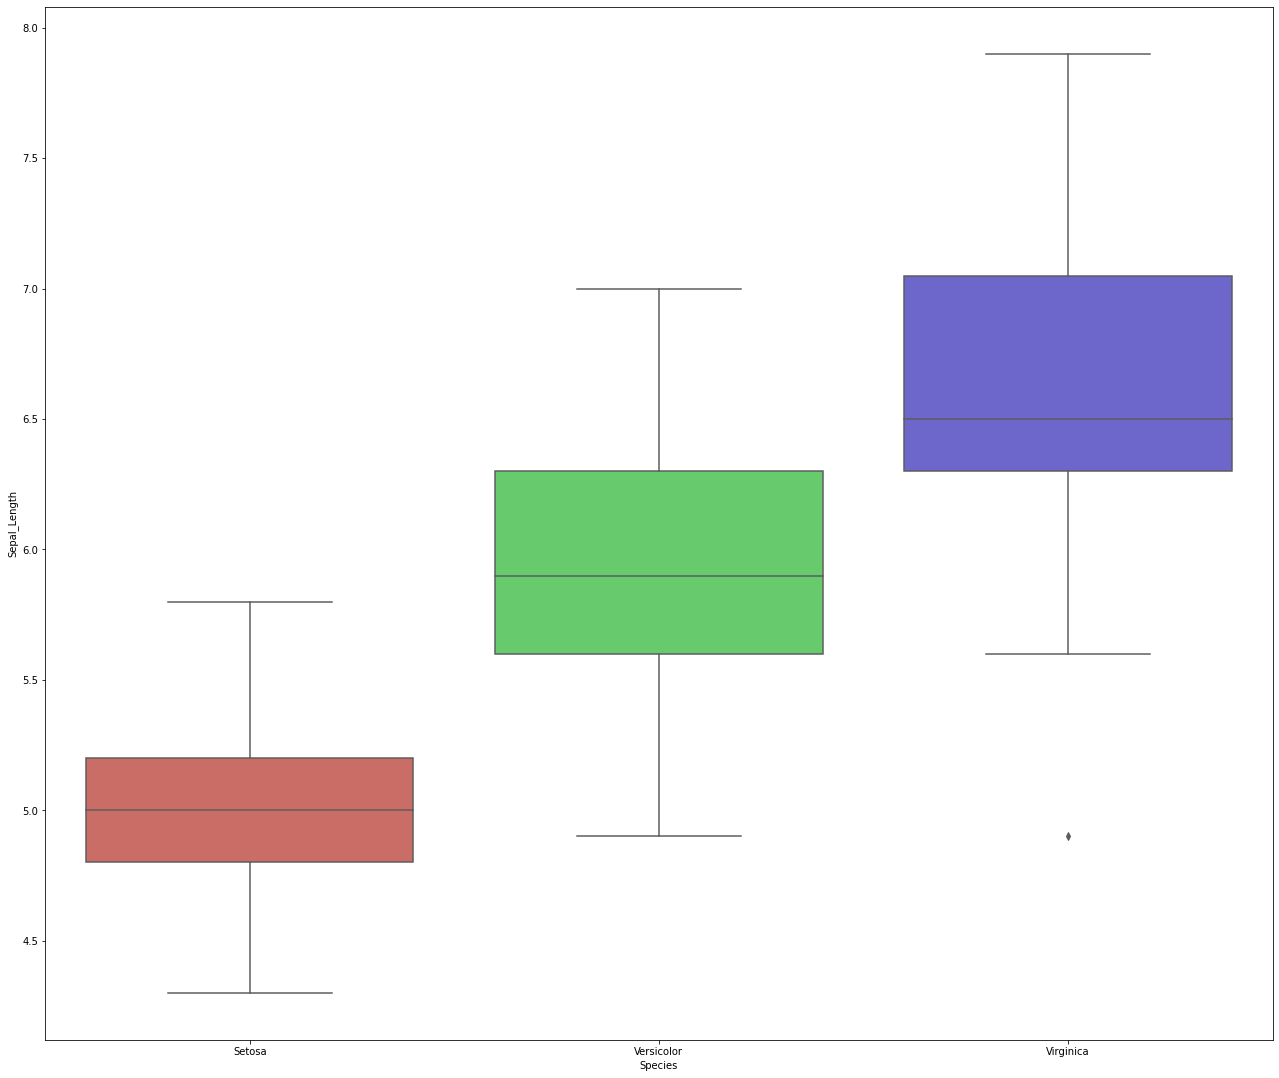

In [29]:
rcParams['figure.figsize'] = 22, 19
DFrame_with_rules['Sepal_Length'] = DFrame_with_rules['Sepal_Length'].astype(float)
sns.boxplot(x = 'Species', y = 'Sepal_Length', data = DFrame, palette = 'hls')